In [ ]:
def skyline_draw(origin_database):
  result_1=skyline(origin_database)
  for record in origin_database:
      plt.scatter(record[0],record[1],c="skyblue")
  for rrr in result_1:
      plt.scatter(rrr[0],rrr[1],c="red") 

In [ ]:
#merging s11 and R2
def merge_basic(s11,R2):
  temporary_r2=[]
  temporary_s11=[]

  for a11 in s11:
    for a2 in R2:
      if dominate(a2,a11)==1: #a2가 지배
        temporary_r2.append(a2)
      elif dominate(a11,a2)==2:
        temporary_s11.append(a11)  
  R2= [x for x in R2 if x not in temporary_r2]
  s11= [x for x in s11 if x not in temporary_s11]    
  R3=s11+R2
  return R3

In [ ]:
import numpy as np

from statistics import median
from sys import getsizeof
import time
import copy
import matplotlib.pyplot as plt
import numpy as np
def dominate (record1, record2):
  result0 = record1[0] - record2[0]
  result1 = record1[1] - record2[1]
  
  if result0<0 and result1<0: #앞에게 뒤에거 지배 
    return 2
  if result0<0 and result1>0:
    return 0
  if result0<0 and result1==0:
    return 2
  if result0>0 and result1<0:
    return 0
  if result0>=0 and result1>=0:
    return 1
  if result0==0 and result1<0:
    return 2

In [ ]:
def skyline(origin_database) :
    start_time = time.time()
    database = copy.copy(origin_database)
    #operating_setting = np.zeros.((database[0].att.shape),dtype='i2') ## 0 for min 1 for max 2 for distinct, basically for min
    w_size = 2
    count =1
    window = []
    temp = []
    skylines = []
    
    while database :
        #print('\n')
        #print(count,'번째 iteration')
        for record in list(database) :
            if not window :
                window.append(record)
                #print('append : window is ', window)
                database.remove(record)
                #print('remove from database is ', record)
                #print('window=',window)
                continue                
            record_dominated = False

            for target in list(window) :
               # print('\nthis turn record is ', record)
               # print('this turn target is ', target)
                if dominate(record, target) == 1 :
                   # print('d=1 : remove from database is ', record)
                    database.remove(record)
                    record_dominated = True
                    
                    break
                elif dominate(record, target) == 2 :
                    #print('d=2 : remove from window is ', target)
                    window.remove(target)
                    
                    continue
                elif dominate(record, target) == 0 :
                   # print('incomparable')
                    continue
            
            if record_dominated :
                continue
            if len(window) < w_size :               
                window.append(record)
               # print('append : window is ', window)
            else :
                
                temp.append(record)
               # print('append : temp is', temp)
            database.remove(record)            
        #print('count는 ',count)
        
        if count != 1 :
          for target in list(window):
           # print('실행할겡 ~!')
            for record_1 in list(skylines):
              
              if dominate(record_1, target) == 2:
                if len(window)!= 0 :
                  #print('지금 window는 : ', window)
                #  print('지금 target은 :', target)

                  window.remove(target)
                 # print('d=2 : remove from window by skylines is ,', target)
                  break
                  #if len(window)==0:
                    #break
              elif dominate(record_1, target) == 1:
                #print('sky에서 뺄게~!')
                skylines.remove(record_1)
        skylines = skylines + window
        #print('skyline : ', skylines)
        count += 1
        database = database + temp
        #print('database : ', database)
        temp.clear()
        #print('temp clear 후 database : ', database)
        window.clear()
    cost_time = time.time() - start_time
    #print('window: ',window)
    #('skylines : ',skylines)
   # print('database: ',database)
    return skylines

In [ ]:
import random
origin_database=[]
num=20
for i in range(num):
  a=[random.randint(10,50) for r in range(2)]
  c=[a[0],a[1]]
  origin_database.append(c)

In [ ]:
def partion(origin_database):
  
  d1=[]
  d2=[]
  for i in range(len(origin_database)):
    d1.append(origin_database[i][0])
    d2.append(origin_database[i][1])
    
    d1_median=median(d1)
    d2_median=median(d2)
  #d1_average 되어있는거 d1_median으로 바꾸기   

  p11=[]
  p21=[]
  p12=[]
  p22=[]
  for i in range(len(origin_database)):
    if origin_database[i][0]<d1_average and origin_database[i][1]<d2_average :
      p11.append(origin_database[i])
    elif origin_database[i][0]>d1_average and origin_database[i][1]>d2_average :
      p22.append(origin_database[i])  
    elif origin_database[i][0]>=d1_average and origin_database[i][1]<=d2_average :
      p21.append(origin_database[i])  
    elif origin_database[i][0]<=d1_average and origin_database[i][1]>=d2_average :
      p12.append(origin_database[i])   

  return p11,p21,p12,p22,d1_average,d2_average


In [ ]:
partion(origin_database)
partion(partion(database)[0])
partion(partion(database)[1])
partion(partion(database)[2])
partion(partion(database)[3])

In [ ]:
def Merge(origin_database):
  p11=partion(origin_database)[0]
  p21=partion(origin_database)[1]
  p12=partion(origin_database)[2]
  p22=partion(origin_database)[3]
  d1_average=partion(origin_database)[4]
  d2_average=partion(origin_database)[5]

  s11=skyline(p11)
  s21=skyline(p21)
  s12=skyline(p12)
  s22=skyline(p22)
  #merging s11 and s21
  R1=merge_basic(s11,s21)

  #merging s12 and s22
  R2=merge_basic(s12,s22)

  #merging s11 and R2
  R3=merge_basic(s11,R2)

  R=R1+R3
  new_R = []
  for v in R:
      if v not in new_R:
          new_R.append(v)

  print(p11)
  print(p21)
  print(p12)
  print(p22)
  print("") 
    

  return new_R,p11,p21,p12,p22

In [ ]:
Merge(origin_database)

[[27, 15], [11, 24], [27, 13], [10, 31], [26, 29], [29, 24], [24, 30]]
[[47, 24], [40, 28], [31, 27], [45, 11]]
[[14, 38], [10, 50], [28, 42], [27, 42]]
[[42, 40], [38, 43], [39, 43], [48, 42], [34, 39]]



[[11, 24], [27, 13], [10, 31], [45, 11]]

In [ ]:
p11=partion(origin_database)[0]
p21=partion(origin_database)[1]
p12=partion(origin_database)[2]
p22=partion(origin_database)[3]

In [ ]:
partion(p11)

([],
 [[27, 15], [27, 13]],
 [[11, 24], [10, 31]],
 [[26, 29], [29, 24], [24, 30]],
 22.0,
 23.714285714285715)

In [ ]:
partion(p21)

([], [[45, 11]], [[40, 28], [31, 27]], [[47, 24]], 40.75, 22.5)

In [ ]:
partion(p12)

([[14, 38]], [[28, 42], [27, 42]], [[10, 50]], [], 19.75, 43.0)

In [ ]:
partion(p22)

([[34, 39]], [[42, 40]], [[38, 43], [39, 43]], [[48, 42]], 40.2, 41.4)

In [ ]:
p11_p11=merge(p11)[1]
p11_p21=merge(p11)[2]
p11_p12=merge(p11)[3]
p11_p22=merge(p11)[4]

NameError: ignored

In [ ]:
Merge(p11)


[[13, 10]]
[]
[[15, 21]]
[[17, 22]]



[[13, 10]]

In [ ]:
Merge(p21)

[[42, 11], [40, 12]]
[[45, 11]]
[[42, 21], [31, 18]]
[[45, 19], [50, 24]]



[[42, 11], [40, 12], [31, 18]]

In [ ]:
Merge(p12)

[[15, 36], [13, 34]]
[[25, 38], [29, 37]]
[[17, 42]]
[[21, 41]]



[[13, 34]]

In [ ]:
Merge(p22)

[[37, 28]]
[[45, 30]]
[[31, 45]]
[[46, 36]]



[[37, 28], [31, 45]]

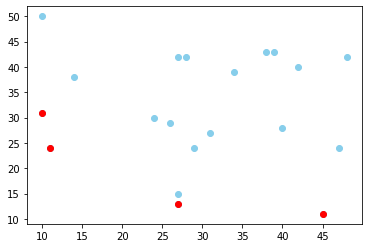

In [ ]:
skyline_draw(origin_database)

In [ ]:
def skyline(origin_database) :
    start_time = time.time()
    database = copy.copy(origin_database)
    #operating_setting = np.zeros.((database[0].att.shape),dtype='i2') ## 0 for min 1 for max 2 for distinct, basically for min
    w_size = 2
    count =1
    window = []
    temp = []
    skylines = []
    
    while database :
        #print('\n')
        #print(count,'번째 iteration')
        for record in list(database) :
            if not window :
                window.append(record)
                #print('append : window is ', window)
                database.remove(record)
                #print('remove from database is ', record)
                #print('window=',window)
                continue                
            record_dominated = False

            for target in list(window) :
               # print('\nthis turn record is ', record)
               # print('this turn target is ', target)
                if dominate(record, target) == 1 :
                   # print('d=1 : remove from database is ', record)
                    database.remove(record)
                    record_dominated = True
                    
                    break
                elif dominate(record, target) == 2 :
                    #print('d=2 : remove from window is ', target)
                    window.remove(target)
                    
                    continue
                elif dominate(record, target) == 0 :
                   # print('incomparable')
                    continue
            
            if record_dominated :
                continue
            if len(window) < w_size :               
                window.append(record)
               # print('append : window is ', window)
            else :
                
                temp.append(record)
               # print('append : temp is', temp)
            database.remove(record)            
        #print('count는 ',count)
        
        if count != 1 :
          for target in list(window):
           # print('실행할겡 ~!')
            for record_1 in list(skylines):
              
              if dominate(record_1, target) == 2:
                if len(window)!= 0 :
                  #print('지금 window는 : ', window)
                #  print('지금 target은 :', target)

                  window.remove(target)
                 # print('d=2 : remove from window by skylines is ,', target)
                  break
                  #if len(window)==0:
                    #break
              elif dominate(record_1, target) == 1:
                #print('sky에서 뺄게~!')
                skylines.remove(record_1)
        skylines = skylines + window
        #print('skyline : ', skylines)
        count += 1
        database = database + temp
        #print('database : ', database)
        temp.clear()
        #print('temp clear 후 database : ', database)
        window.clear()
    cost_time = time.time() - start_time
    #print('window: ',window)
    #('skylines : ',skylines)
   # print('database: ',database)
    return skylines

In [ ]:
a=[1,2,3,4]
numpy.

2.5

In [ ]:

median_index=len(M)//2


2

# 수도코드 보고 따라하기


In [1]:
import numpy as np
from sys import getsizeof
import time
import copy
import matplotlib.pyplot as plt

In [2]:
def Median(M):

  median_index=len(M)//2
  
  return median_index

In [3]:
def Partition(M,dimension,pivot):
  # 0-th dim, 1-th dim
  print(dimension)
  M=M[np.argsort(M[:,dimension-1])] 
  P1= M[:pivot]
  P2= M[pivot:]
  #print("P1",P1)
  #print("P2",P2)
  return P1,P2


In [4]:
'''
M : input of the skyline operation
R: output of the skyline operation
p<q: point is dominated by point quit
'''
def SkylineBasic(M, dimension):
    start_time = time.time()    
    print("input data M=")
    print(M)
    if len(M) == 1:
      return M
    else:
      pivot= Median(M)
      P1,P2 = Partition(M,dimension,pivot)
      print('P1',P1)
      print('P2',P2)
      print("p1,p2 나눈거 출력 해봤고.")
      s1=SkylineBasic(P1,dimension)
      s2=SkylineBasic(P2,dimension)
      print("s1",s1)
      print("s2",s2)
      print("MergeBasic(s1,s2)",)
      R = MergeBasic(s1,s2,dimension)
      print("결과 R=", R)
      print("")
      print('MergeBasic 완전 끝') 

      print('extend 전에')
      print("s1",s1)
      print("R",R)
      if len(R) != 0:
        s1 = np.concatenate([s1,R], axis=0)

      cost_time = time.time() - start_time
      print("cost_time",cost_time)
    
      return s1 #중복된거 나중에 빼야징
      
    '''
    aaa=s1+MergeBasic(s1,s2,dimension)
    new_new = []
    for v in aaa:
      if v not in new_new:
        new_new.append(v)
    aaa=new_new 
    '''
      


In [8]:
M=np.array([[44,3,1],[82,2,10],[79,7,19],[54,13,30]])
dimension=3
domination = SkylineBasic(M,dimension)


input data M=
[[44  3  1]
 [82  2 10]
 [79  7 19]
 [54 13 30]]
3
P1 [[44  3  1]
 [82  2 10]]
P2 [[79  7 19]
 [54 13 30]]
p1,p2 나눈거 출력 해봤고.
input data M=
[[44  3  1]
 [82  2 10]]
3
P1 [[44  3  1]]
P2 [[82  2 10]]
p1,p2 나눈거 출력 해봤고.
input data M=
[[44  3  1]]
input data M=
[[82  2 10]]
s1 [[44  3  1]]
s2 [[82  2 10]]
MergeBasic(s1,s2)
*******************MergeBasic: 시작*******************
s1 [[44  3  1]]
s2 [[82  2 10]]
if 1
dominate function
3
dominate True
dominate function
3
if 1: s1={p}일떄 [array([44,  3,  1]), array([82,  2, 10])]
R [array([44,  3,  1]), array([82,  2, 10])]
*******************MergeBasic: 끝*******************
결과 R= [array([44,  3,  1]), array([82,  2, 10])]

MergeBasic 완전 끝
extend 전에
s1 [[44  3  1]]
R [array([44,  3,  1]), array([82,  2, 10])]
cost_time 0.005404233932495117
input data M=
[[79  7 19]
 [54 13 30]]
3
P1 [[79  7 19]]
P2 [[54 13 30]]
p1,p2 나눈거 출력 해봤고.
input data M=
[[79  7 19]]
input data M=
[[54 13 30]]
s1 [[79  7 19]]
s2 [[54 13 30]]
MergeBasic(s1,s2)
****

[[44  3  1]
 [44  3  1]
 [82  2 10]
 [82  2 10]
 [79  7 19]
 [44  3  1]
 [44  3  1]]


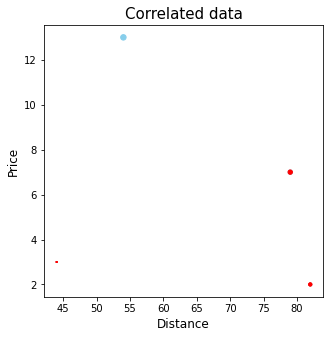

In [9]:
domination = np.array(domination)
print(domination)
plt.figure(figsize=(5,5))
plt.scatter(M[:,0], M[:,1], color='skyblue',s=M[:,2])
plt.scatter(domination[:,0], domination[:,1], color='r',s=domination[:,2])
plt.title("Correlated data",fontsize=15)
plt.xlabel('Distance',fontsize=12)
plt.ylabel('Price',fontsize=12) 
plt.show()

In [5]:
def dominate (p, q):
  '''
  args:
    p: 이미 젤 쎈거 알고 있음
    q: p보다 약한지 아닌지 알아볼거
  return:
    True: q가 dominate 안됨 (p로부터)
    False: q는 쓰잘데기 없음
  '''
  assert len(p) == len(q)
  print('dominate function')
  print(len(p))

  for i in range(len(q)):
    if p[i] > q[i]:
      return True  #q가 dominate 안됨
    
  return False  

In [6]:
def Minimum(M,dimension):
  dim_array=[]
  for i in range(len(M)):
    dim_array.append(M[i][dimension-1])
  print(dim_array)
  dim_minimum=min(dim_array)
  
  
  return dim_minimum
  

In [7]:
def MergeBasic(s1,s2,dimension):
  print("*******************MergeBasic: 시작*******************")
  print("s1",s1)
  print("s2",s2)
  R=[]
  if len(s1)==1:
    print("if 1")
    p = s1[0]
    R.append(p)
    for q in s2:
      print('dominate', dominate(p,q))
      if dominate(p,q): # p가 q를 dominate 하지않는경우
        R.append(q)# p에 dominate 되지않는 s2의 q를 R에 넣는다  
        print("if 1: s1={p}일떄",R)
  # elif S2 한개짜리 일 때 구현 안함  
  elif dimension==2:
    print("if 2")
    Min = Minimum(s1,dimension-1)
    for q in s2:
      if q[dimension-2]<Min:
        R.append(q)
        print("if 3: dimension2 일때(낮은 차원일때)",R)  
  else:
    print('else로 갔음')
    pivot=Median(s1)
    s11,s12=Partition(s1,dimension-1,pivot)
    pivot=Median(s2)
    s21,s22=Partition(s2,dimension-1,pivot) 
    
    #s11= SkylineBasic(P11,dimension-1)
    #s12= SkylineBasic(P12,dimension-1)
    #s21= SkylineBasic(P21,dimension-1)
    #s22= SkylineBasic(P22,dimension-1)

    print("s11",s11)
    print("s12",s12)
    print("s21",s21)
    print("s22",s22)
    R1=MergeBasic(s11,s21,dimension)
    
    R2=MergeBasic(s12,s22,dimension)
    
    R3=MergeBasic(R1,R2,dimension-1)
    
    R=R1+R3
    print("R1",R1)
    print("R2",R2)
    print("R3",R3)
    print("R",R)

    
    print("else일때",R)
  print("R",R)
  print("*******************MergeBasic: 끝*******************")
  
  
  return R  

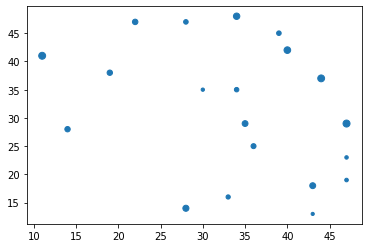

array([[43, 18, 35],
       [40, 42, 44],
       [47, 19, 13],
       [33, 16, 18],
       [44, 37, 47],
       [30, 35, 11],
       [35, 29, 34],
       [19, 38, 29],
       [11, 41, 48],
       [34, 35, 20],
       [14, 28, 29],
       [43, 13, 10],
       [28, 14, 37],
       [34, 48, 41],
       [28, 47, 21],
       [36, 25, 25],
       [47, 23, 12],
       [22, 47, 30],
       [39, 45, 21],
       [47, 29, 49]])

In [252]:

M = np.random.randint(10,50,size=(20, 3,))
#for i in range(len(M)):
#  M[i]=np.round(M[i],1)
plt.scatter(M[:, 0], M[:, 1],M[:,2])
plt.show()

M

input data M=
[[43 18 35]
 [40 42 44]
 [47 19 13]
 [33 16 18]
 [44 37 47]
 [30 35 11]
 [35 29 34]
 [19 38 29]
 [11 41 48]
 [34 35 20]
 [14 28 29]
 [43 13 10]
 [28 14 37]
 [34 48 41]
 [28 47 21]
 [36 25 25]
 [47 23 12]
 [22 47 30]
 [39 45 21]
 [47 29 49]]
3
P1 [[43 13 10]
 [30 35 11]
 [47 23 12]
 [47 19 13]
 [33 16 18]
 [34 35 20]
 [39 45 21]
 [28 47 21]
 [36 25 25]
 [19 38 29]]
P2 [[14 28 29]
 [22 47 30]
 [35 29 34]
 [43 18 35]
 [28 14 37]
 [34 48 41]
 [40 42 44]
 [44 37 47]
 [11 41 48]
 [47 29 49]]
p1,p2 나눈거 출력 해봤고.
input data M=
[[43 13 10]
 [30 35 11]
 [47 23 12]
 [47 19 13]
 [33 16 18]
 [34 35 20]
 [39 45 21]
 [28 47 21]
 [36 25 25]
 [19 38 29]]
3
P1 [[43 13 10]
 [30 35 11]
 [47 23 12]
 [47 19 13]
 [33 16 18]]
P2 [[34 35 20]
 [39 45 21]
 [28 47 21]
 [36 25 25]
 [19 38 29]]
p1,p2 나눈거 출력 해봤고.
input data M=
[[43 13 10]
 [30 35 11]
 [47 23 12]
 [47 19 13]
 [33 16 18]]
3
P1 [[43 13 10]
 [30 35 11]]
P2 [[47 23 12]
 [47 19 13]
 [33 16 18]]
p1,p2 나눈거 출력 해봤고.
input data M=
[[43 13 10]
 [30 

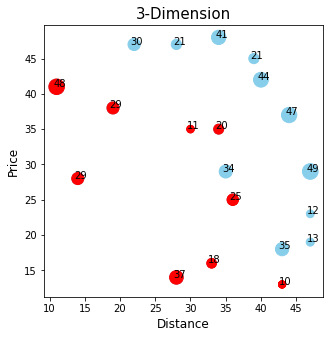

[[43 13 10]
 [43 13 10]
 [30 35 11]
 [43 13 10]
 [33 16 18]
 [30 35 11]
 [43 13 10]
 [36 25 25]
 [36 25 25]
 [34 35 20]
 [33 16 18]
 [19 38 29]
 [43 13 10]
 [28 14 37]
 [14 28 29]
 [11 41 48]]


In [255]:
domination = SkylineBasic(M, 3)
domination = np.array(domination)

plt.figure(figsize=(5,5))
plt.scatter(M[:,0], M[:,1],s=M[:,2]*5 ,color='skyblue')
plt.scatter(domination[:,0], domination[:,1],s=domination[:,2]*5, color='r')
x=M[:,0]
y=M[:,1]
for i in range(len(x)):
  plt.text(x[i]-0.5,y[i] ,"{}".format(M[:,2][i]), fontsize=10)
plt.title("3-Dimension",fontsize=15)
plt.xlabel('Distance',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.savefig('/content/drive/My Drive/skyline operator/3-d',dpi=300,transparent=True) 
plt.show()
print(domination)

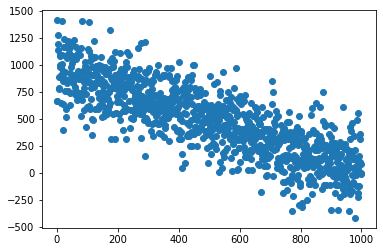

In [213]:
sy = np.linspace(start=1000, stop=10, num=1000) + np.random.normal(loc=0, scale=200, size=(1000,))
plt.scatter(np.arange(1000), y)
plt.show()
M = np.array(list(zip(np.arange(1000), y)))

array([[46.91494656, 45.65944152, 31.09229083],
       [19.61003416, 46.32308294, 42.08101325],
       [11.03110971, 38.28761058, 41.98834594],
       [42.73602737, 42.3911378 , 19.8178366 ],
       [37.74092952, 16.43570151, 12.17163493],
       [32.01450798, 24.87438538, 47.47167268]])

In [ ]:
M=np.array([[44,3,100],[82,2,20],[79,7,25],[54,13,70],[39,7,30],[75,13,45],[49,12,47],[92,6,50],[45,15,29],[77,4,84]])
print(M.shape)
dimension=3
domination = SkylineBasic(M,dimension)